# Essential Libraries

- ```Pandas```: Library for data acquisition and preparation
- ```NumPy```: Library for numeric computations in python
- ```Matplotlib```: Low-level library for data visualisation
- ```Seaborn```: Higher-level library for data visualisation
- ```scikit-learn```: Basic library for machine learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [ ]:
## Remove this code block before exporting
!wget -nc https://leephilipx.github.io/linlog/all_seasons.csv
!wget -nc https://leephilipx.github.io/linlog/kc_house_data.csv
!wget -nc https://leephilipx.github.io/linlog/purchase.csv
!wget -nc https://leephilipx.github.io/linlog/iris.csv

--2021-03-15 00:45:51--  https://leephilipx.github.io/linlog/all_seasons.csv
Resolving leephilipx.github.io (leephilipx.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to leephilipx.github.io (leephilipx.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1663182 (1.6M) [text/csv]
Saving to: ‘all_seasons.csv’

all_seasons.csv     100%[===================>]   1.59M  --.-KB/s    in 0.08s   

2021-03-15 00:45:53 (20.2 MB/s) - ‘all_seasons.csv’ saved [1663182/1663182]

--2021-03-15 00:45:53--  https://leephilipx.github.io/linlog/kc_house_data.csv
Resolving leephilipx.github.io (leephilipx.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to leephilipx.github.io (leephilipx.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [text/csv]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>]   2.4

# Simple Linear Regression

NBA Players Dataset from: https://www.kaggle.com/justinas/nba-height-and-weight-analysis/?select=all_seasons.csv

Quick download link: https://drive.google.com/file/d/19u4DF8b5YT4ODbo1SCdmpsosRtBgzhVo/view?usp=sharing

Columns include:
*   player_name
*   team_abbreviation
*   age
*   player_height - in kg
*   player_weight - in kg
*   college - Name of the college the player attended
*   country - Name of the country the player was born in
*   draft year - The year the player was drafted
*   draft round - The draft round the player was picked
*   draft number - The number at which the player was picked in his draft round
*   gp - Games played throughout the season
*   pts - Average number of points scored
*   reb - Average number of rebounds grabbed
*   ast - Average number of assists distributed
*   net_rating - Team's point differential per 100 possessions while the player is on the court
*   oreb_pct - Percentage of available offensive rebounds the player grabbed while he was on the floor
*   dreb_pct - Percentage of available defensive rebounds the player grabbed while he was on the floor
*   usg_pct - Percentage of team plays used by the player while he was on the floor (FGA + Possession Ending FTA + TO) / POSS)
*   ts_pct - Measure of the player's shooting efficiency that takes into account free throws, 2 and 3 point shots (PTS / (2*(FGA + 0.44 * FTA)))
*   ast_pct - Percentage of teammate field goals the player assisted while he was on the floor
*   season - NBA season

















In [ ]:
df = pd.read_csv('all_seasons.csv')
df.head()

Unnamed: 0        player_name team_abbreviation  ...  ts_pct  ast_pct   season
0           0      Dennis Rodman               CHI  ...   0.479    0.113  1996-97
1           1  Dwayne Schintzius               LAC  ...   0.430    0.048  1996-97
2           2       Earl Cureton               TOR  ...   0.376    0.148  1996-97
3           3        Ed O'Bannon               DAL  ...   0.399    0.077  1996-97
4           4        Ed Pinckney               MIA  ...   0.611    0.040  1996-97

[5 rows x 22 columns]

We will start by analysing whether the weight of a NBA player is a good predicting factor for the height of that particular player


In [ ]:
simple_df = df[['player_weight', 'player_height']]
simple_df

player_weight  player_height
0          99.790240         198.12
1         117.933920         215.90
2          95.254320         205.74
3         100.697424         203.20
4         108.862080         205.74
...              ...            ...
11140     108.862080         208.28
11141      97.522280         195.58
11142     117.933920         213.36
11143     104.779752         208.28
11144      86.182480         193.04

[11145 rows x 2 columns]

Plotting and Analysing Correlation

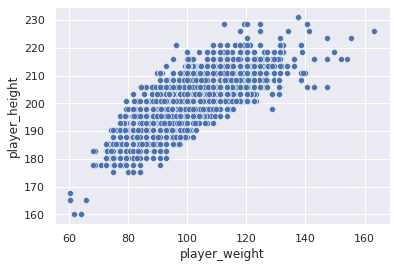

In [ ]:
sns.scatterplot(data=simple_df, x='player_weight', y='player_height')

In [ ]:
simple_df.player_weight.corr(simple_df.player_height, method='pearson')

0.8299014317109461

Using the formula

In [ ]:
X = simple_df['player_weight'].values
Y = simple_df['player_height'].values
mean_x = np.mean(X)
mean_y = np.mean(Y)

n = len(X)

numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    
b1 = numer/denom
b0 = mean_y - b1 * mean_x

print("coefficient:", b1, "\nintercept:", b0)

coefficient: 0.6065062928723072 
intercept: 139.7753182135122


Documentation for sklearn's linear regression model (normal equation): 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

---



In [ ]:
X = X.reshape((len(X), 1)) # reshaping the array to fit as input for sklearn framework  
from sklearn.linear_model import LinearRegression

# instantiate linear regression object
reg = LinearRegression()
# train the model
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("coefficient: ", reg.coef_)
print("intercept: ", reg.intercept_)

coefficient:  [0.60650629]
intercept:  139.77531821351425


In [ ]:
# evaluate with built-in r2 score function
reg.score(X, Y)

0.688736386355878

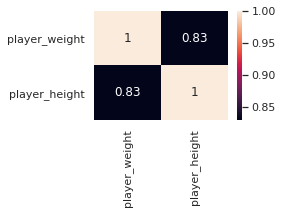

In [ ]:
sns.set(rc={'figure.figsize':(3,2)})
sns.heatmap(data=simple_df.corr(), annot=True)

## Lasso Regression

Documentation for sklearn's lasso regression model:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=2)

lasso_reg.fit(X, Y)

Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [ ]:
lasso_reg.score(X, Y)

0.6884369465878175

##Ridge Regression

Documentation for sklearn's ridge regression model:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html


In [ ]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=2)

ridge_reg.fit(X, Y)

Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge_reg.score(X, Y)

0.6887363863549911

Combined Plots

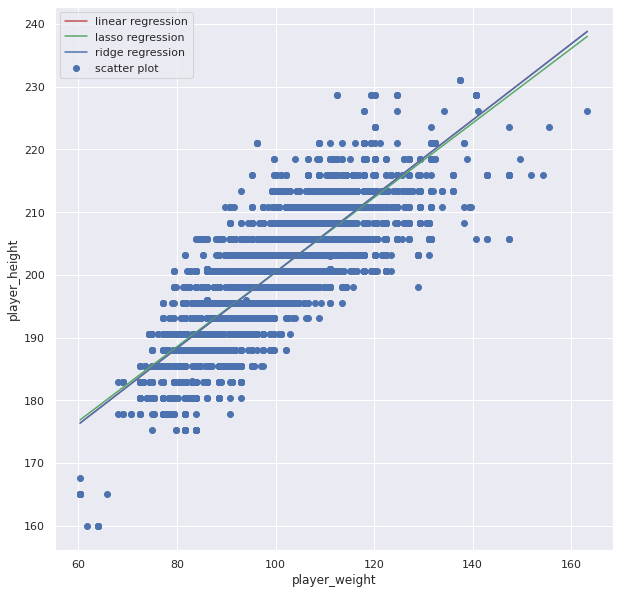

In [ ]:
plt.figure(figsize=(10, 10))

max_x = np.max(X)
min_x = np.min(X)

x = np.linspace(min_x, max_x, 1000)
y_lin = reg.coef_[0]*x + reg.intercept_
y_las = lasso_reg.coef_[0]*x + lasso_reg.intercept_
y_rid = ridge_reg.coef_[0]*x + ridge_reg.intercept_

# plotting the regression line
plt.plot(x, y_lin, 'r-', label='linear regression')
plt.plot(x, y_las, 'g-', label='lasso regression')
plt.plot(x, y_rid, 'b-', label='ridge regression')

# plotting the training samples
plt.scatter(X, Y, label='scatter plot')

plt.xlabel('player_weight')
plt.ylabel('player_height')
plt.legend()
plt.show()

## SGDRegressor

For more insights on Stochastic Gradient Descent: 

https://rumankhan1.medium.com/understanding-optimization-in-ml-with-gradient-descent-implement-sgd-regressor-from-scratch-4e11dac74c9

Documentation for sklearn's SGDRegressor(gradient descent):

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

In [ ]:
from sklearn.linear_model import SGDRegressor
SGDReg = SGDRegressor(eta0 = 0.000001, verbose=1, max_iter=1000, learning_rate='adaptive')

Documentation for sklearn's standard scaler:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
# scaling the data according to standard normal distribution ==> z = (x - u) / s
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [ ]:
SGDReg.fit(X_scaled, Y)

-- Epoch 1
Norm: 0.08, NNZs: 1, Bias: 2.225633, T: 11145, Avg. loss: 19981.790216
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.17, NNZs: 1, Bias: 4.426603, T: 22290, Avg. loss: 19541.612807
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.25, NNZs: 1, Bias: 6.603178, T: 33435, Avg. loss: 19111.138216
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.33, NNZs: 1, Bias: 8.755632, T: 44580, Avg. loss: 18690.152611
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.41, NNZs: 1, Bias: 10.884227, T: 55725, Avg. loss: 18278.447185
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.49, NNZs: 1, Bias: 12.989229, T: 66870, Avg. loss: 17875.817418
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.57, NNZs: 1, Bias: 15.070904, T: 78015, Avg. loss: 17482.062997
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.65, NNZs: 1, Bias: 17.129511, T: 89160, Avg. loss: 17096.987548
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 0.73, NNZs: 1, Bias: 19.165298, T: 100305, 

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=1e-06, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=1,
             warm_start=False)

In [ ]:
# note that coefficient and intercept of regressor cannot be compared to sklearn linear regression model 
# as the training samples in regressor has been scaled

print("coefficient: ", SGDReg.coef_)
print("intercept: ", SGDReg.intercept_)

coefficient:  [7.61575633]
intercept:  [200.52973097]


In [ ]:
# evaluate with built-in r2 score function
SGDReg.score(X_scaled, Y)

0.6877860586818119

## Mutiple Variable Linear Regression

Maybe weight itself is not a good enough predictor for a player's height. For this part, we shall add in another predictor variable called 'reb', which is the average number of rebounds grabbed per game by a player. Rebound means ball or shot that bounces back after striking a the frame or the rim.

In [ ]:
df_multi = df[['player_weight', 'reb', 'player_height']]
df_multi

player_weight   reb  player_height
0          99.790240  16.1         198.12
1         117.933920   1.5         215.90
2          95.254320   1.0         205.74
3         100.697424   2.3         203.20
4         108.862080   2.4         205.74
...              ...   ...            ...
11140     108.862080   5.4         208.28
11141      97.522280   0.3         195.58
11142     117.933920   5.1         213.36
11143     104.779752   3.0         208.28
11144      86.182480   1.4         193.04

[11145 rows x 3 columns]

In [ ]:
df_multi.describe()

player_weight           reb  player_height
count   11145.000000  11145.000000   11145.000000
mean      100.637868      3.560036     200.812818
std        12.576295      2.495394       9.190973
min        60.327736      0.000000     160.020000
25%        90.718400      1.800000     195.580000
50%        99.790240      3.000000     200.660000
75%       109.315672      4.700000     208.280000
max       163.293120     16.300000     231.140000

In [ ]:
X = df_multi[['player_weight', 'reb']].values.reshape((-1, 2))
Y = df_multi['player_height']

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("coefficients: ", reg.coef_)
print("intercept: ", reg.intercept_)

coefficients:  [0.58280942 0.2734388 ]
intercept:  141.18666933854345


In [ ]:
# abit of improvement from the previous model with only 1 predictor variable
reg.score(X, Y)

0.6931965658889703

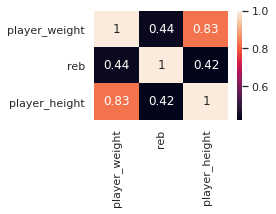

In [ ]:
sns.set(rc={'figure.figsize':(3,2)})
sns.heatmap(data=df_multi.corr(), annot=True)

3D Visualisation of the Multivariate Linear Regression Model


In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# setup
x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(60, 180, 100)   # range of porosity values
y_pred = np.linspace(0, 20, 100)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# train model
multi_reg = LinearRegression()
model = multi_reg.fit(X, Y)
predicted = model.predict(model_viz)

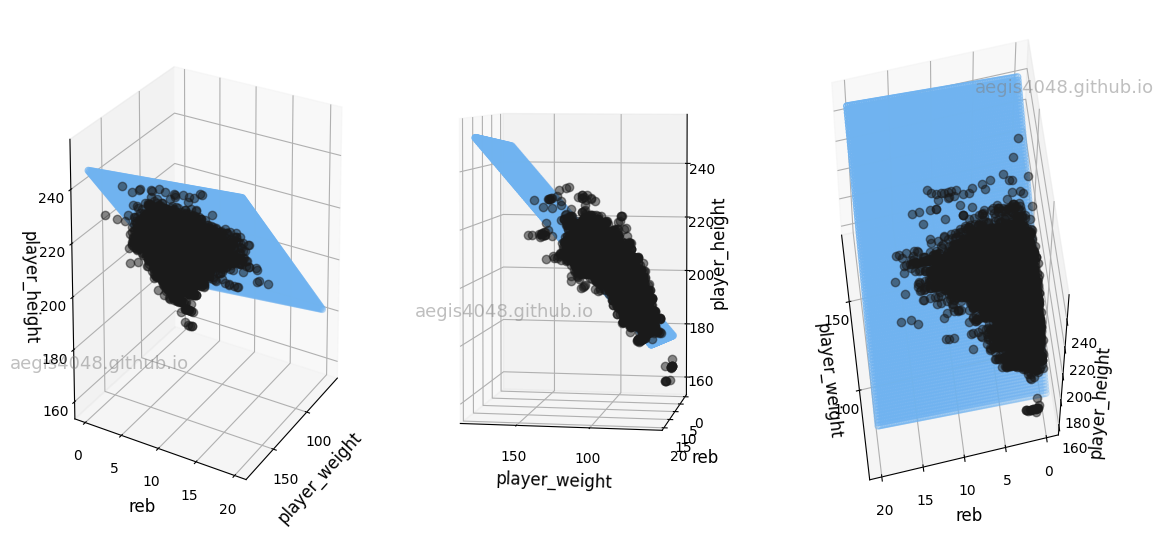

In [ ]:
#plotting 3D models
plt.style.use('default')

fig = plt.figure(figsize=(12, 5.5))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('player_weight', fontsize=12)
    ax.set_ylabel('reb', fontsize=12)
    ax.set_zlabel('player_height', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

# credits
ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

# ‘elev’ stores the elevation angle in the z plane. ‘azim’ stores the azimuth angle in the x,y plane.
ax1.view_init(elev=20, azim=30)
ax2.view_init(elev=4, azim=100)
ax3.view_init(elev=60, azim=170)

fig.tight_layout()

# Full Pipeline Walkthrough (Linear Regression)

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Exploratory Data Analysis

Dataset of House Sales in King County, USA: https://www.kaggle.com/harlfoxem/housesalesprediction

Quick Download Link: https://drive.google.com/file/d/1HREApvec84pUxXuGSONaRUgDVDxWjoNq/view?usp=sharing


* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

#### Extracting Info

In [ ]:
df = pd.read_csv('kc_house_data.csv')
df.head()

id             date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900.0  ... -122.257           1340        5650
1  6414100192  20141209T000000  538000.0  ... -122.319           1690        7639
2  5631500400  20150225T000000  180000.0  ... -122.233           2720        8062
3  2487200875  20141209T000000  604000.0  ... -122.393           1360        5000
4  1954400510  20150218T000000  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns]

In [ ]:
df.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.161300e+04  2.161300e+04  ...   21613.000000   21613.000000
mean   4.580302e+09  5.400881e+05  ...    1986.552492   12768.455652
std    2.876566e+09  3.671272e+05  ...     685.391304   27304.179631
min    1.000102e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.219500e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
# checking for null values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Checking on discrete varaiables

In [ ]:
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [ ]:
df['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

#### Visualisation and Cleaning


In [ ]:
# plot heatmap
sns.set(rc={'figure.figsize':(11.7,8.27)}) #read at startup to configure
corr_matrix = df.corr().round(2)
##Your Code Here##

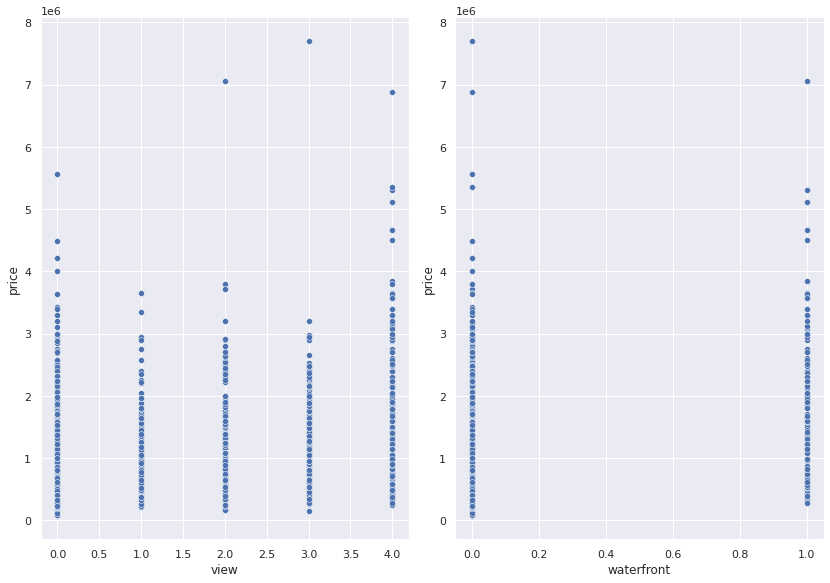

In [ ]:
# plotting out the relationship between the 2 discrete variables and the price
fig, ax= plt.subplots(ncols=2, nrows=1)
sns.scatterplot(x="view", y="price",data=df, ax=ax[0])
sns.scatterplot(x="waterfront", y="price",data=df, ax=ax[1])
plt.tight_layout()

In [ ]:
# drop all that has magnitude of correlation coefficients less than 0.1
df.drop(['id','date','zipcode','condition','long','sqft_lot15','yr_built','sqft_lot','view','waterfront','yr_renovated']
        ,axis=1,inplace=True)

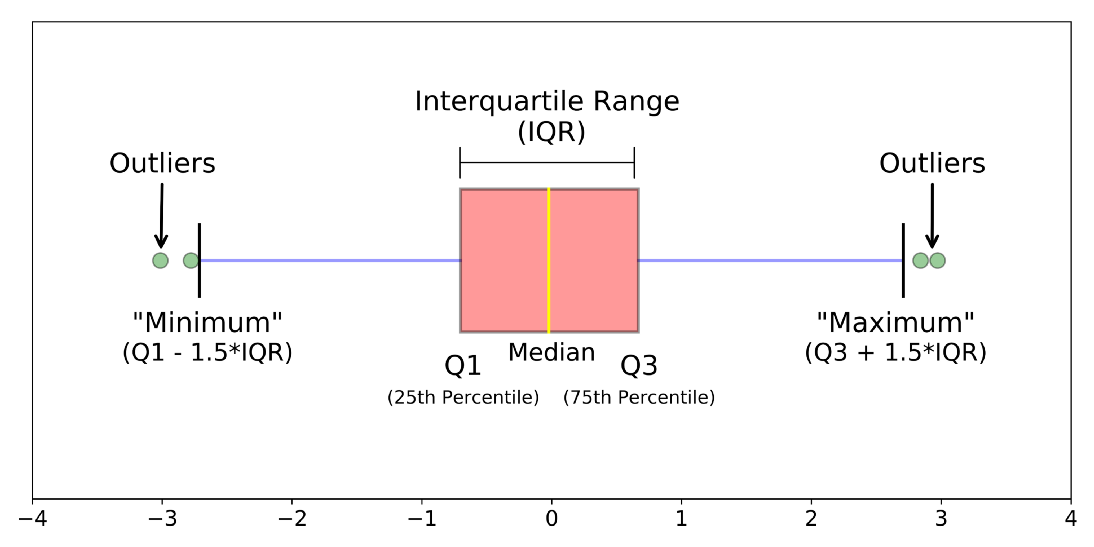

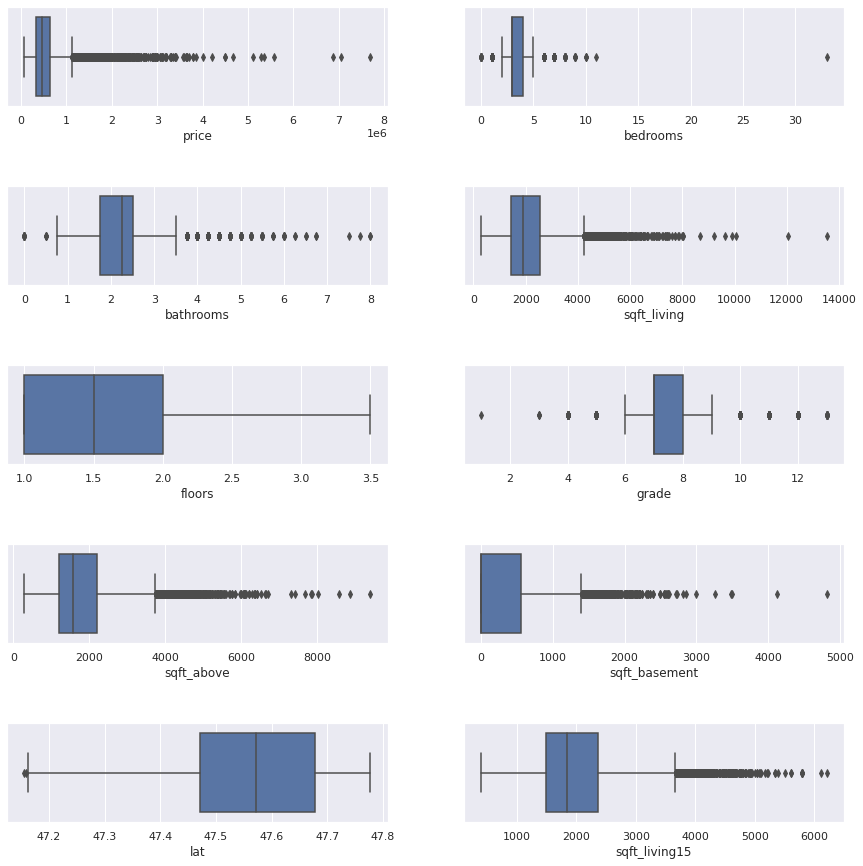

In [ ]:
## Adjustments
f,ax = plt.subplots(figsize=(15, 15), nrows=5, ncols=2)
plt.subplots_adjust(hspace=0.8)

## Features
sns.boxplot(x='price',data=df,ax=ax[0][0])
sns.boxplot(x='bedrooms',data=df,ax=ax[0][1])
sns.boxplot(x='bathrooms',data=df,ax=ax[1][0])
sns.boxplot(x='sqft_living',data=df,ax=ax[1][1])
sns.boxplot(x='floors',data=df,ax=ax[2][0])
sns.boxplot(x='grade',data=df,ax=ax[2][1])
sns.boxplot(x='sqft_above',data=df,ax=ax[3][0])
sns.boxplot(x='sqft_basement',data=df,ax=ax[3][1])
sns.boxplot(x='lat',data=df,ax=ax[4][0])
sns.boxplot(x='sqft_living15',data=df,ax=ax[4][1]);

In [ ]:
columnsList = df.columns
columnsList

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade',
       'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'],
      dtype='object')

In [ ]:
for column in columnsList:

    # Q1 & Q2 definition
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    IQR = Q3-Q1

    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    df[column] = np.where(df[column]>upper_limit,upper_limit,df[column])
    df[column] = np.where(df[column]<lower_limit,lower_limit,df[column])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

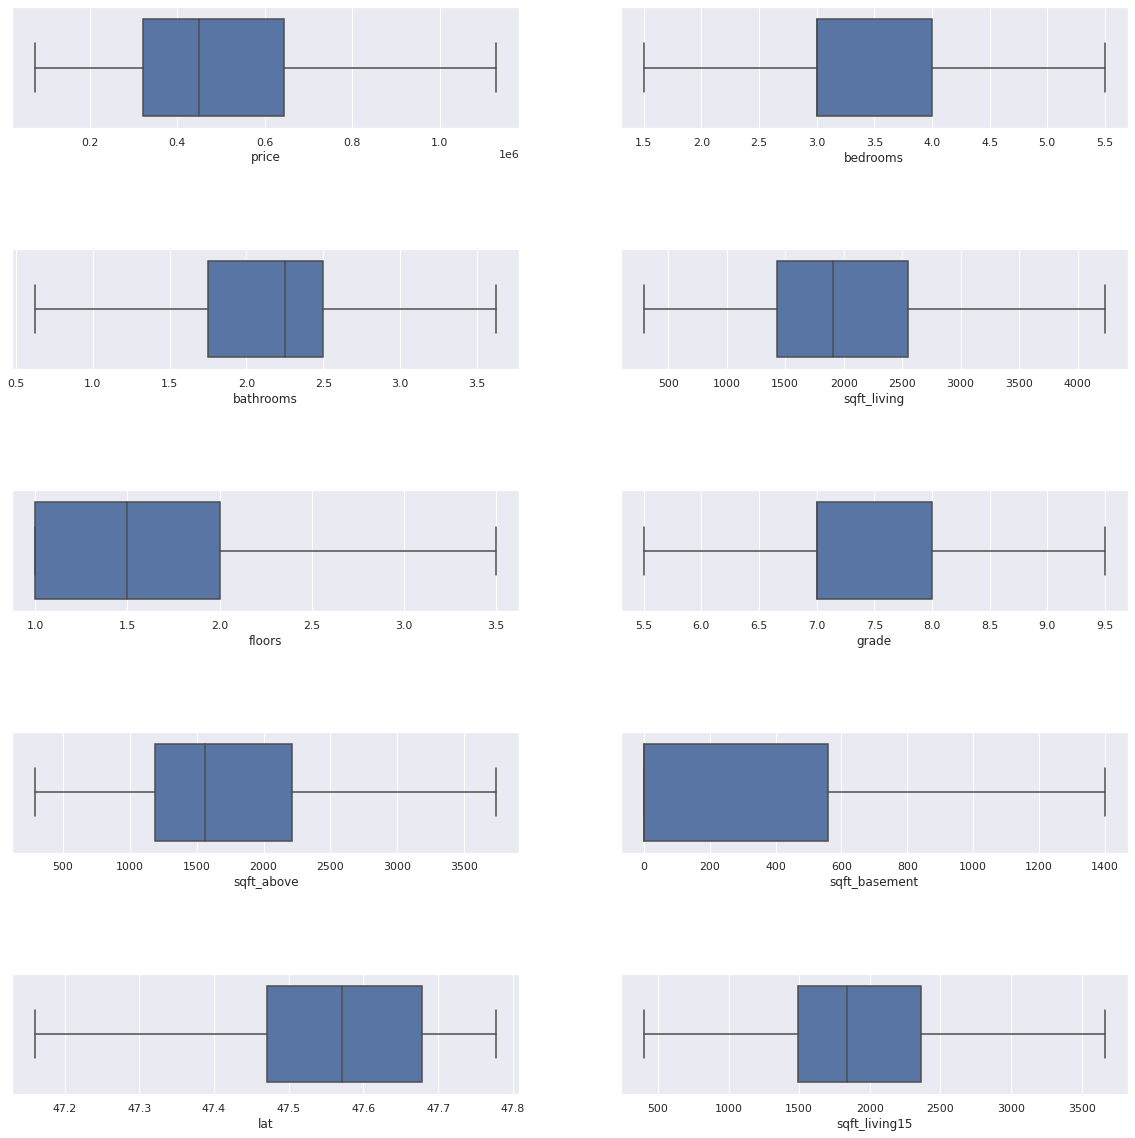

In [ ]:
##### Is this code block extra?

## Adjustments
f,ax=plt.subplots(figsize=(20, 20),nrows=5,ncols=2)
plt.subplots_adjust(hspace=1)
## Features
sns.boxplot(df['price'],data=df,ax=ax[0][0])
sns.boxplot(df['bedrooms'],data=df,ax=ax[0][1])

sns.boxplot(df['bathrooms'],data=df,ax=ax[1][0])
sns.boxplot(df['sqft_living'],data=df,ax=ax[1][1])

sns.boxplot(df['floors'],data=df,ax=ax[2][0])
sns.boxplot(df['grade'],data=df,ax=ax[2][1])

sns.boxplot(df['sqft_above'],data=df,ax=ax[3][0])
sns.boxplot(df['sqft_basement'],data=df,ax=ax[3][1])

sns.boxplot(df['lat'],data=df,ax=ax[4][0])
sns.boxplot(df['sqft_living15'],data=df,ax=ax[4][1])

### Training A Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
##Set your predictor variables to be all columns other than 'Price'##
##Your Code Here##

##Set your response variable to be 'Price'##
##Your Code Here##

Documentation for sklearn's train_test_split function: 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# perform train test split
from sklearn.model_selection import train_test_split
##Your Code Here## 

In [ ]:
# scale data according to standard normal distribution
from sklearn.preprocessing import StandardScaler
##Your Code Here##

In [ ]:
# instantiate and train linear regression model
##Your Code Here##



```
# This is formatted as code
```

### Model Evaluation

In [ ]:
# Make predictions with new model and assign them to a variable named 'predictions'
##Your Code Here##

In [ ]:
predictions

NameError: ignored

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', ##Your Code Here##)
print('R2_score: ', r2_score(y_test, predictions))

### Feature Engineering

Log Transform

*   helps to handle skewed data and after transformation, the distribution becomes more approximate to normal
*   decreases the effect of the outliers due to the normalization of magnitude differences and the model become more robust





Dummy Variable Encoding

*   Converts categorical features into multiple binary features



In [ ]:
sns.pairplot(df);

In [ ]:
sns.scatterplot(data=df, x='sqft_basement', y='price');

In [ ]:
df['log_sqft']=np.log(df['sqft_basement']+1)
sns.scatterplot(data=df, x='log_sqft', y='price');
#df.drop('sqft_basement', axis=1, inplace=True)

In [ ]:
encoded_columns = pd.get_dummies(df['floors'])
df = df.join(encoded_columns).drop('floors', axis=1)

### Train Another Model

In [ ]:
##Set your predictor variables to be all columns other than 'Price'##
X = df.drop(['price'], axis=1)

##Set your response variable to be 'Price'##
y = df['price']

In [ ]:
# perform train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21) 

In [ ]:
# scale data according to standard normal distribution
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

In [ ]:
# instantiate and train linear regression model
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

### Evaluate Again

In [ ]:
# Make predictions with new model and assign them to a variable named 'predictions'
predictions = LinReg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R2_score: ', r2_score(y_test, predictions))

In [ ]:
### Use this code to display which features are important

from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import MinMaxScaler

X_train, X_valid, y_train, y_valid = train_test_split(df[features], df['open_flag'], test_size=0.05, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

model = Ridge(alpha=1e-2, max_iter=1000)
model.fit(X_train_scaled, y_train)

print('\nFeatures with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(df[features]), model.coef_)), key = lambda e: -abs(e[1])):
    if e[1] != 0: print('• {}, {:.3f}'.format(e[0], e[1]))
print()

NameError: ignored

===== End of Linear Regression Part =====

<br><hr>

# Polynomial Regression

Define a custom function for easy data plotting

In [ ]:
def plot_data(X, y, title='', X_line=[], y_line=[]):
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, marker='o', s=50, alpha=0.8)
    if len(y_line) > 0:  # Only plot line when given
        plt.plot(X_line, y_line, 'r-')
    plt.title(title)
    plt.xlabel('Feature value (x)')
    plt.ylabel('Target value (y)')
    plt.show()

### 1-variable Polynomial Regression but \\(\text{deg}(p(x))\geq1\\)

We first generate the whole set of features using ```PolynomialFeatures```.  
Then, we apply the same multi-variable linear regression on these features.

> Replace all instance of ```None``` below with your own code.  
> *Try changing the polynomial degree number and re-run the code, observe the graph plotted!*

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
n = 15
X_R2 = np.linspace(0, 10, n) + np.random.randn(n)/5
y_R2 = np.sin(X_R2) + X_R2/6 + np.random.randn(n)/10

train_scores = []
test_scores = []
end_deg = 11

for deg in range(1, end_deg):
    
    poly = None (degree=deg)  ## Insert code here
    X_poly = poly.fit_transform(X_R2.reshape(-1, 1))

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y_R2, random_state=0)

    linreg = LinearRegression().fit(None, None)  ## Insert code here
    train_scores.append(linreg.score(X_train, y_train))
    test_scores.append(linreg.score(X_test, y_test))

    ## Try changing this to see different curves of best fit ##
    if deg == 7:
        x_fit = np.linspace(0, 10, 1000)
        y_fit = linreg.predict(poly.fit_transform(x_fit.reshape(-1, 1)))
        plot_data(X_R2, y_R2, 'Least squares polynomial regression of best deg=7', X_line=x_fit, y_line=y_fit)
        print(f'Features: {poly.get_feature_names()}')

    # Prematurely break for-loop when test R2 is negative
    if (test_scores[-1] < 0 and deg > 2) or (deg == end_deg):  
        end_deg = deg
        break

The best fit curve is chosen by observing that the highest R2-score occurs at a polynomial degree of 7, as seen below. However, do be careful of overfitting!

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, end_deg+1), train_scores, 'b-')
plt.plot(np.arange(1, end_deg+1), test_scores, 'r--')
plt.title('Train & test R2 scores')
plt.xlabel('Polynomial degree')
plt.ylabel('R-squared scores')
plt.legend(['Train', 'Test'])
plt.show()

### 2-variable Polynomial Regression

Model features are generated from the original variables.  
Eg. The multiplicative combination of variables $x_0$ and $x_1$ will form the set $\{1, x_0, x_1, x_0^2, x_0x_1,x_1^2,...\}$.

In [ ]:
np.random.seed(0)
n = 15
X1_R3 = np.linspace(0, 10, n) + np.random.randn(n)/5
X2_R3 = np.linspace(10, 0, n) + np.random.randn(n)/5
X_R3 = np.array([X1_R3, X2_R3])
y_R3 = np.sin(X1_R3) + np.sin(X2_R3) + X1_R3/6 + np.random.randn(n)/10

for deg in range(1, 5):
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(X_R3.reshape(-1, 2))
    linreg = LinearRegression().fit(X_poly, y_R3)
    print(f'Degree {deg} features: {poly.get_feature_names()}')

===== End of Polynomial Regression Part =====

<br><hr>

# Logistic Regression

- Linear regression: $y=\mathbf{w}^T\mathbf{x}+b$   
- Logistic regression: $z=\mathbf{w}^T\mathbf{x}+b$  
The output $z$ from the linear regression equation is then passed through a sigmoid function i.e. $y=\sigma(z)$, where $\sigma(z)=\frac{1}{1+e^{-z}}$  
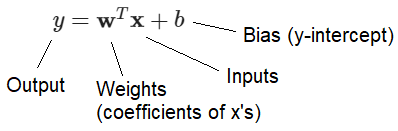 
<br><br>
- A graph of the sigmoid/logistic function is shown below; this function has a non-linear mapping.  
<img width="350px" src="https://qph.fs.quoracdn.net/main-qimg-6b67bea3311c3429bfb34b6b1737fe0c"/>

## Implementation in Python

### Sigmoid Function

We will try to implement the sigmoid function using ```np.exp```. You may refer to the formula above.

```python
Expected output:
array([0.26894142, 0.31479902, 0.36457644, 0.41742979, 0.47225076,
       0.52774924, 0.58257021, 0.63542356, 0.68520098, 0.73105858])
```
  
> Replace all instance of ```None``` below with your own code.

In [ ]:
def sigmoid(z):
    return None  ## Insert code here

sigmoid(np.linspace(-1, 1, 10))

You can try plotting the sigmoid curve that we have been talking about too!

> Replace all instance of ```None``` below with your own code.

In [ ]:
x = np.linspace(-10, 10, 100)
y = None  ## Insert code here

plt.figure(figsize=(6, 4))
plt.plot(x, y)
plt.plot(np.linspace(-10, 10, 100), np.ones(100)*0.5)
plt.plot(np.zeros(100), np.linspace(0, 1, 100))
plt.legend(['Sigmoid curve', 'Decision boundary'])
plt.title('Sigmoid Function');

### Hypothesis and Loss Function

The hypothesis is $h_\theta(x)=\sigma(\sum_{i=1}^m\theta_ix_i)=\sigma(\mathbf{\theta}^T\mathbf{x})$. [Note: $\mathbf{\theta}$ is a vector of weights]


*How did this happen? $z=\mathbf{w}^T\mathbf{x}+b=\mathbf{\theta}^T\mathbf{x}$*

<br>

The loss function mentioned in the slides is listed below:
\\[J(\theta)=-\frac{1}{m}\sum_{i=1}^m\bigg(y^{(i)}\log{(h_\theta(x^{(i)}))}+(1-y^{(i)})\log{(1-h_\theta(x^{(i)}))}\bigg)\\]

<br>

We will observe how incorrect predictions will cause a large loss. Again, we use the power of vectorization to speed up our calculations.

> Replace all instance of ```None``` below with your own code.

In [ ]:
x = np.array([[1, 2, -3, 4, 5],
              [-5, -4, 3, -2, -1]])
y = np.array([[1, 0, 0, 1, 0]])

# Initialise the weights with random values
np.random.seed(0)
theta = np.random.randn(2, 1)

def print_loss(iter=0, verbose=True):

    hypothesis = None  ## Insert code here
    loss_contribution = -(None * np.log(None) + None)
    
    if verbose:
        print('\033[36mh(x)\ty   Loss (Individual Contribution)\033[0m')
        for i in range(5):
            print(f'{hypothesis[0][i].round(3)}\t{y[0][i]}   {loss_contribution[0][i].round(3)}')
        print('')

    print(f'\033[94mLoss (Iteration #{iter})\033[0m = {None.round(3)}')  ## Insert code here

print_loss()

### Gradient Descent

Now, we update the weights using the gradient descent algorithm. The formula is given below:

\\[\theta_j\leftarrow\theta_j-\alpha\frac{1}{m}\sum_{i=1}^m\bigg(h_\theta(x^{(i)})-y^{(i)}\bigg)x^{(i)}_j\\]

> *Try re-running the code block above and changing the learning rate (alpha) yourself!*

In [ ]:
alpha = 0.05

theta = theta - alpha * np.mean(sigmoid(x)-y, axis=0) @ x.T
print('Iteration #1:')
print_loss(1)
print('\n---------------------------------')

for i in range(2, 11):
    theta = theta - alpha * np.mean(sigmoid(x)-y, axis=0) @ x.T
    print_loss(i, verbose=False)

As you can see, the  loss decreases with each iteration. When it converges to a minima, the weights can then be used to classify from new input data.

All these math might seem a bit daunting. Fortunately, logistic regression is already implemented in ```scikit-learn```. Hence, we will use this for convenience in future examples.

## Binary Classification

This data science problem is to predict whether a customer purchases an item. Firstly, import the dataset.  
We will be utilising ```sklearn.linear_model.LogisticRegression```. You can read more about this classifier from the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [ ]:
from sklearn.linear_model import LogisticRegression

# Explore data
df_log1 = pd.read_csv('purchase.csv')
df_log1.head()

### Exploratory Data Analysis (EDA)
There is only a little class imbalance.


In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Purchased', data=df_log1, palette='Blues_d');

### Model Fitting and Predictions

Extract the $x$ and $y$ data, then perform train-test split. After that, apply standardization to the training data before fitting the logistic regression classifier. (Click [here](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/) for a detailed explanation of why standardization is used)

*Reflection Question:* Why is male/female not converted to 0/1 to be used in predictions?

> Replace all instance of ```None``` below with your own code.

In [ ]:
# Extract x and y data
x = df_log1.iloc[:,[2,3]].values
y = df_log1.iloc[:, 4].values

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(None)  ## Insert code here
x_test = sc.transform(None)  ## Insert code here

# Fitting logistic regression to the training set
Classifier = None (random_state=0)  ## Insert code here
Classifier.fit(None, None)  ## Insert code here

# Predicting the results
print("Train accuracy score : ", Classifier.score(x_train, y_train))
print("Test accuracy score  : ", Classifier.score(x_test, y_test))

We can see below that the model actually predicts the probabilities that the set of inputs is a 0 or 1.  
Comparison is then done to determine the actual prediction.  

*The code below demonstrates the last 10 prediction values by the model.*

In [ ]:
probs = Classifier.predict_proba(x_test)
print('\033[36mIndex\tP(0)\tP(1)\tPred\033[0m')
for i in range(len(probs)-10, len(probs)):
    print(f'{i}\t{probs[i,0].round(3)}\t{probs[i,1].round(3)}\t{int(probs[i,1].round(0))}')

The predictions can also be obtained directly by calling the ```predict()``` method.  
You can compare the last 10 values below with the results above.

In [ ]:
Classifier.predict(x_test)

The two plots below show the decision boundary and the actual labels of the data points for **both train and test set**.  
From the plots, it can be seen that the 2D space is divided into two regions - 0 and 1.

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
cmap = ['red', 'green']

def plot_log_reg(X_set, y_set, axes):

    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01))

    ax[axes].contourf(X1, X2, Classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75)

    for i, j in enumerate(np.unique(y_set)):
        ax[axes].scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], c=cmap[i], label = j)          

    ax[axes].set_xlim(X1.min(), X1.max())
    ax[axes].set_ylim(X1.min(), X1.max())
    ax[axes].set_title(f'Logistic Regression ({"Train" if not axes else "Test"} set)')
    ax[axes].set_xlabel('Age')
    ax[axes].set_ylabel('Estimated Salary')
    ax[axes].legend();

plot_log_reg(x_train, y_train, 0)
plot_log_reg(x_test, y_test, 1)

## Multiclass Classification

From the documentation, ```sklearn.linear_model.LogisticRegression``` implements the one-vs-rest (OvR) scheme or multinomial for multiclass cases.

This data science problem is to predict the species of flower based on its features.  Firstly, import the [dataset](https://github.com/mwaskom/seaborn-data/blob/master/iris.csv).  

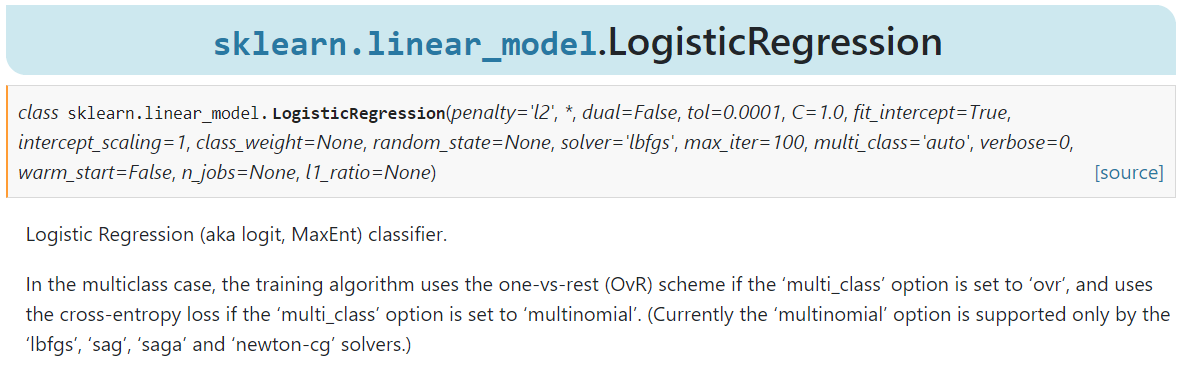

In [ ]:
df_log2 = pd.read_csv('iris.csv')
df_log2.head()

Pre-process the data as usual; EDA won't be shown in the example here but it should be done to gain insight from the dataset.

> Replace all instance of ```None``` below with your own code.

In [ ]:
# Extract x and y data
x = df_log2.iloc[:, range(4)].values
y = df_log2.iloc[:, None].values  ## Insert code here

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

We will try out both OvR and Multinomial in the code blocks below.

> Replace all instance of ```None``` below with your own code.

In [ ]:
# Fitting logistic regression to the training set
Classifier = LogisticRegression(random_state=0, multi_class='ovr')
Classifier.fit(x_train, y_train)

# Predicting the results
print('\033[94mOne-vs-rest (OvR) scheme\033[0m')
print('- Train accuracy score :', Classifier.score(x_train, y_train))
print('- Test accuracy score  :', Classifier.score(x_test, y_test), end='\n\n')

# Sample of predictions
probs = Classifier.predict_proba(x_test)
print(f'\033[36mIndex\tP({Classifier.classes_[0]})\tP({Classifier.classes_[1]})\tP({Classifier.classes_[2]})\tPrediction\033[0m')
for i in range(10):
    print(f'{i}\t{probs[i,0].round(3)}\t\t{probs[i,1].round(3)}\t\t{probs[i,2].round(3)}\t\t{Classifier.predict(x_test)[i]}')

In [ ]:
# Fitting logistic regression to the training set
Classifier = LogisticRegression(random_state=0, multi_class=None)  ## Insert code here
Classifier.fit(x_train, y_train)

# Predicting the results
print('\033[94mMultinomial\033[0m')
print('- Train accuracy score :', Classifier.score(x_train, y_train))
print('- Test accuracy score  :', Classifier.score(x_test, y_test), end='\n\n')

# Sample of predictions
probs = Classifier.predict_proba()  ## Insert code here
print(f'\033[36mIndex\tP({Classifier.classes_[0]})\tP({Classifier.classes_[1]})\tP({Classifier.classes_[2]})\tPrediction\033[0m')
for i in range(10):
    print(f'{i}\t{probs[i,0].round(3)}\t\t{probs[i,1].round(3)}\t\t{probs[i,2].round(3)}\t\t{Classifier.predict(x_test)[i]}')

Check out the coefficients of the features used to make the classification (multinomial method).

In [ ]:
Classifier.coef_

===== End of Logistic Regression Part =====

<br><hr>

# Thank you for listening!

That is all! There's also a way to implement binary and multiclass classification in neural networks. They  make use of the same *sigmoid* and *softmax* function that you have just learned as activation functions for the neurons, so don't forget them!  

